# Gradient Descent

### Intuition 
An iterative method to update the independent variable to minimize the function or dependent variable.eg. Let a function F(x)=y=$(x-8)^{2}$, here y is dependent variable and x is independent variable. 

### Update Rule of Gradient Descent

***Step size*** :- Also called as learning rate .

***Direction of update*** :- In which direction to go to get x for minimum y, this is given be slope of F(x) at point (x,F(x)).

Therefore, 

***updated x = current x - (learning rate ${*}$ slope of F(x)) ***

### Code of Gradient Descent

In [9]:
%matplotlib notebook

In [1]:
x=1
lr=0.1
x_list=[]
y_list=[]
for i in range(50):
    grad=2*(x-8)  #slope of function (x-8)^2
    x=x-(lr*grad)
    x_list.append(x)
    y_list.append((x-8)**2)


## Visualization based on above example

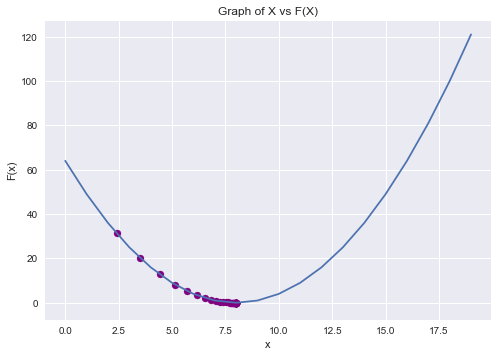

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X=np.arange(20)
Y=(X-8)**2

plt.style.use("seaborn")
plt.plot(X,Y)
plt.title("Graph of X vs F(X)")
plt.ylabel("F(x)")
plt.xlabel("x")
plt.scatter(x_list,y_list,color="purple")
plt.show()

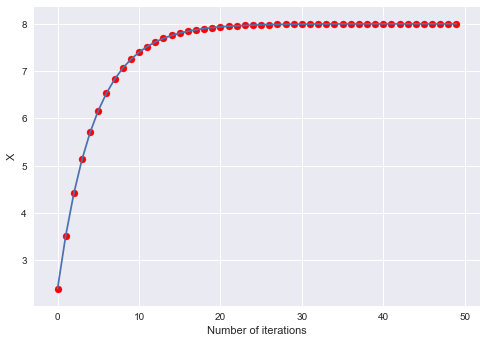

In [3]:
x_axis=np.arange(50)
plt.plot(x_axis,x_list)
plt.xlabel("Number of iterations")
plt.ylabel("X")
plt.scatter(x_axis,x_list,color="red")
plt.show()

## Visualization of gradient descent in 3D

Let **z = F(x,y)** =  $(x-1)^{2}$ + $(y-1)^{2}$ 

here x,y are independent variables and we need to find the value of x,y for which z is minimum

### Update Rules

 updated_x = current_x - (learningRate ${*}$ ${\frac{{\partial}F(x,y)}{{\partial}{x}}}$)
 
 updated_y = current_y - (learningRate ${*}$ ${\frac{{\partial}F(x,y)}{{\partial}{y}}}$)
 
 ${\frac{{\partial}F(x,y)}{{\partial}{x}}}$ = 2 ${*}$ (x-1)
 
 ${\frac{{\partial}F(x,y)}{{\partial}{y}}}$ = 2 ${*}$ (y-1)

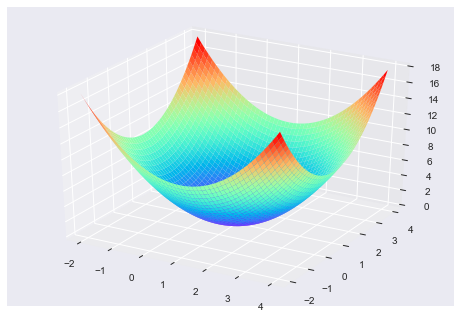

In [4]:
from mpl_toolkits.mplot3d import Axes3D 
x= np.arange(-2,4,0.02)
y=x
x,y=np.meshgrid(x,y)
fig= plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(x,y,(x-1)**2+(y-1)**2,cmap='rainbow')


In [34]:
%matplotlib notebook

<IPython.core.display.Javascript object>


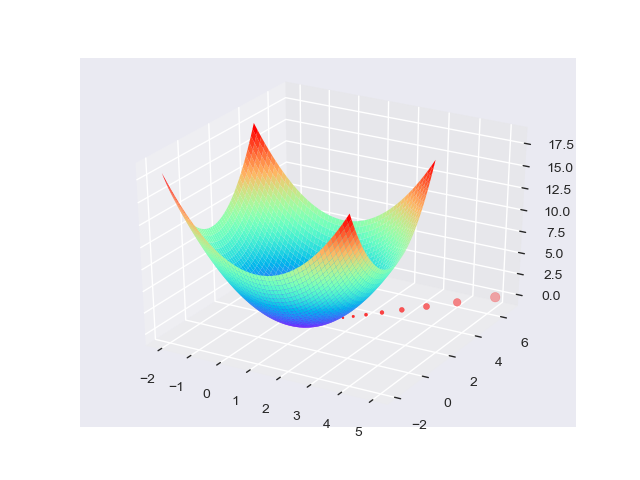

In [36]:
x,y=6,8
x_val=[]
y_val=[]
f_val=[]
lr=0.1
for i in range(20):
    x=x-(lr*2*(x-1))
    y=y-(lr*2*(y-1))
    x_val.append(x)
    y_val.append(y)
    f_val.append((x-1)**2+(y-1)**2)
x= np.arange(-2,4,0.02)
y=x
x,y=np.meshgrid(x,y)
fig= plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(x,y,(x-1)**2+(y-1)**2,cmap='rainbow')
plt.scatter(x_val,y_val,f_val,color="red")    
    


## Gradient Descent in Linear Regression

In linear regression, in order to find best fit line we minimize the cost/loss function .

*Loss Function* J($\theta$) = $\sum_{i=0}^{m}$ ${(y_{pred} - y_{actual})^2}$ / m

$y_{pred}$ = $\theta_1$ x +  $\theta_0$ , here x refers to features but for visualization assume only one feature

### Update Rules

$\theta_1 = \theta_1 - (learningRate {*}\frac{{\partial}J(\theta)}{{\partial}\theta_1}$)

$\theta_0 = \theta_0 - (learningRate {*}\frac{{\partial}J(\theta)}{{\partial}\theta_0}$)

$\frac{{\partial}J(\theta)}{{\partial}\theta_0}$ = $\frac{1}{m}$  $\sum_{i=0}^{m}$ 2 ${*}$ (${y_{pred} - y_{actual}}$)

$\frac{{\partial}J(\theta)}{{\partial}\theta_1}$ = $\frac{1}{m}$ $\sum_{i=0}^{m}$ 2 ${*}$ (${y_{pred} - y_{actual}}$) $x_{i}$ 



In [5]:
# preparing dataset to visualize
from sklearn.datasets import make_regression
import seaborn as sns


In [6]:
X,Y = make_regression(n_samples = 1000, n_features=1, noise = 50.0, n_informative=2, shuffle = True, random_state=3, bias=5) 
X.shape,Y.shape, type(X), type(Y)

((1000, 1), (1000,), numpy.ndarray, numpy.ndarray)

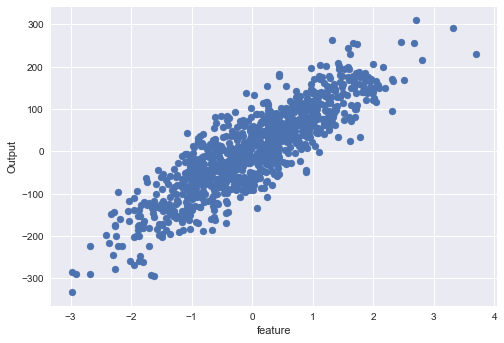

In [7]:
plt.scatter(X,Y)
plt.xlabel("feature")
plt.ylabel("Output")
plt.show()


### Code of helping functions


In [19]:
def prediction(theta,x):
    y=theta[1]*x +theta[0]
    return y
def gradient(X,Y,theta,lr):
    m=X.shape[0]
    grad=np.array([0,0])
    for i in range(m):
        y_=prediction(theta,X[i])
        grad[0]+=(lr*(y_-Y[i]))
        grad[1]+=(lr*(y_-Y[i])*X[i])
    grad=grad/m   
    return grad[1],grad[0]
def getError(X,Y,theta):
    m=X.shape[0]
    e=0;
    for i in range(m):
        y_=prediction(theta,X[i])
        e+=(y_-Y[i])**2
    e=e/m
    return e    

### Code of gradient descent

In [23]:
lr=0.1
theta=np.array([1,1])
th1=[]
th0=[]
error=[]
for i in range (50):
    t1,t0=gradient(X,Y,theta,lr)
    theta[1]=theta[1]-t1;
    theta[0]=theta[0]-t0;
    th1.append(theta[1])
    th0.append(theta[0])
    error.append(getError(X,Y,theta))



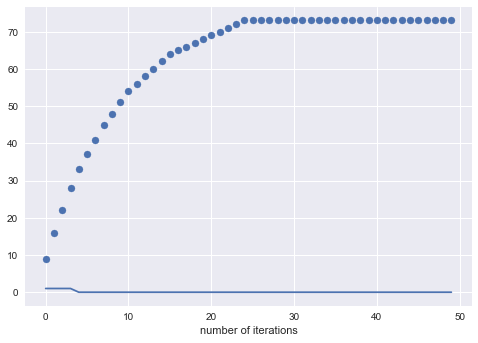

In [25]:
x=np.arange(50)
#plt.plot(x,error)
plt.scatter(x,th1)
plt.xlabel("number of iterations")
plt.plot(x,th0)
plt.show()

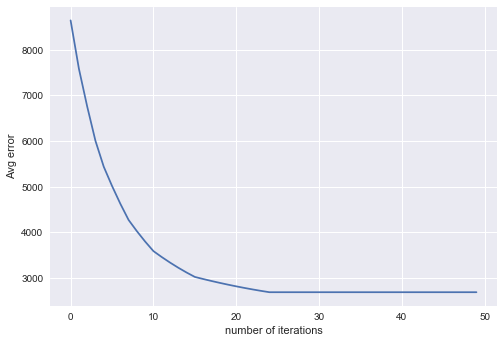

In [26]:
plt.plot(x,error)
plt.xlabel("number of iterations")
plt.ylabel("Avg error")
plt.show()

In [ ]:
plt.plot(th1,error)
plt.show()